In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import oxyba as ox; from importlib import reload; reload(ox);

### Load Demo Dataset
Sklearn's `load_breast_cancer` demo dataset provides 30 variables. 

In [2]:
from sklearn.preprocessing import normalize
from sklearn.datasets import load_breast_cancer
tmp = load_breast_cancer()
N = len(tmp.target);
X = np.c_[ np.ones(shape=(N,1)), normalize(tmp.data, norm='l2') ];

### Find the "bad" variables
Just a quick note. If $X$ variables are **not** normalized or scaled to a similar range then the required tolerance for ill-conditioned matrices is much higher. Lower tresholds like `tol=1e-8` are working for normalize or scaled variables only.

In [3]:
flag, num, s = ox.features_check_singular(X, tol=1e-8);

According to our definition here (`s_k < 1e-2`) the of features or design matrix $X$ is ill-conditioned

In [4]:
flag

True

How may variables have a too low Singular Value?

In [5]:
num

4

A singular value **cannot** be linked to a certain variable, feature or column index of $X$. 
Singular values are ordered as a result of the SVD algorithm.

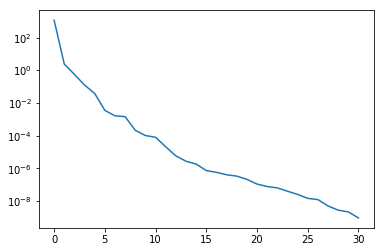

In [6]:
plt.semilogy(s);